In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
def lrs(x,y):
    x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score: "+ str(accuracy_score(y_pred,y_test)))
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print("Precision score:" , precision_score(y_pred, y_test))
    print('Recall score:' ,recall_score(y_pred, y_test))
    print('G-mean score:',geometric_mean_score(y_pred, y_test))
    print('Fl score:', f1_score(y_pred, y_test))
    logit_roc_auc=roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds =roc_curve(y_test, model.predict_proba(x_test)[ :,1])
    plt.figure()
    plt.plot(fpr, tpr, label="AUC= %0.2f" % auc(fpr, tpr))
    plt.plot ([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
train = pd.read_csv("/content/train.csv")
train = train.dropna(axis=0)
x = train.drop(['target'], axis =1).select_dtypes(exclude = ['object'])
y = train.target

Accuracy Score: 0.9633354915453299
[[63978     0]
 [ 2435     0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


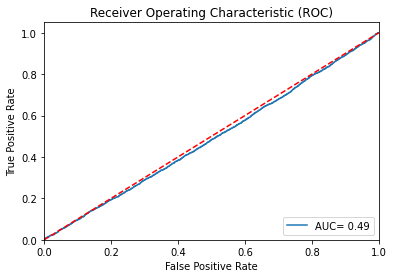

In [ ]:
lrs(x,y)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state = 0)
x_resampled_rus, y_resampled_rus = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled_rus).items()))

[(0, 8072), (1, 8072)]


Accuracy Score: 0.5113542526837325
[[1132 1299]
 [1068 1345]]
Precision score: 0.5573974305843349
Recall score: 0.5086989409984871
G-mean score: 0.5116138463947765
Fl score: 0.531935930393514


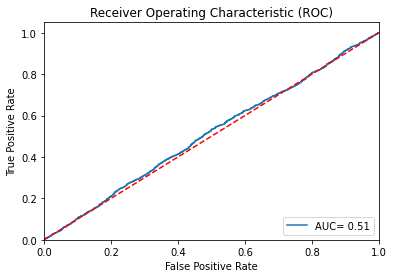

In [ ]:
lrs(x_resampled_rus,y_resampled_rus)

In [ ]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy= "majority")
x_resanpled_tl, y_resampled_tl = tl.fit_resample(x, y)
print(sorted(Counter(y_resampled_tl).items()))

[(0, 208832), (1, 8072)]


Accuracy Score: 0.9614119744283256
[[62561     0]
 [ 2511     0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


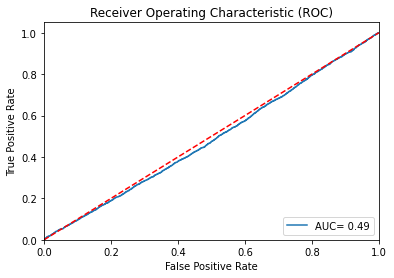

In [ ]:
lrs(x_resanpled_tl,y_resampled_tl)

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
x_resampled_enn, y_resampled_enn = enn.fit_resample(x,y)
print(sorted(Counter(y_resampled_enn).items()))

[(0, 191204), (1, 8072)]


Accuracy Score: 0.9591689945302176
[[57342     0]
 [ 2441     0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


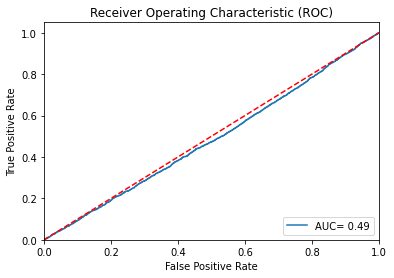

In [ ]:




lrs(x_resampled_enn,y_resampled_enn)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_resample (x, y)
len (X_resampled_ros)

426604

Accuracy Score: 0.5002265943648325
[[64020     0]
 [63962     0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fl score: 0.0


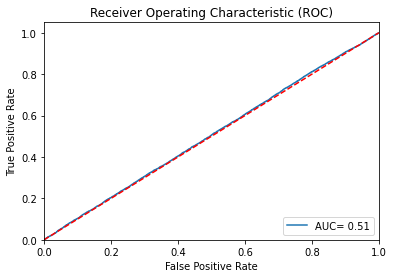

In [ ]:
lrs(X_resampled_ros,y_resampled_ros)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,k_neighbors=5)
X_resampled_sm, y_resampled_sm = sm.fit_resample (x, y)
len (X_resampled_sm)
print(sorted(Counter(y_resampled_sm).items()))

[(0, 213302), (1, 213302)]


Accuracy Score: 0.5003828663405792
[[64040     0]
 [63942     0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fl score: 0.0


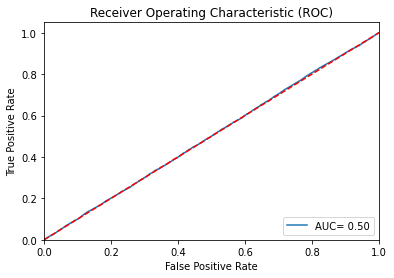

In [ ]:
lrs(X_resampled_sm,y_resampled_sm)

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=42,n_neighbors=5)
X_resampled_ad, y_resampled_ad=ad.fit_resample(x, y)
len (X_resampled_ad)
print(sorted(Counter(y_resampled_ad).items()))

[(0, 213302), (1, 210689)]


Accuracy Score: 0.6132250507083444
[[39004 25049]
 [24148 38997]]
Precision score: 0.6175785889619131
Recall score: 0.6088904849639322
G-mean score: 0.6132401950237034
Fl score: 0.6132037644172937


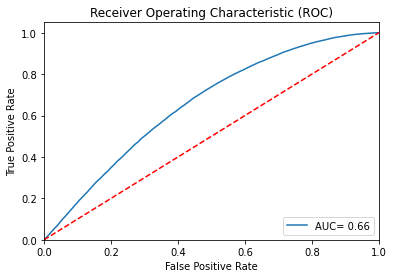

In [ ]:
lrs(X_resampled_ad,y_resampled_ad)

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
x_resampled_smen, y_resampled_smen = smote_enn.fit_resample(x, y)
print(sorted(Counter(y_resampled_smen).items()))

[(0, 106792), (1, 174584)]


Accuracy Score: 0.6202954521223034
[[    0 32052]
 [    0 52361]]
Precision score: 1.0
Recall score: 0.6202954521223034
G-mean score: 0.0
Fl score: 0.7656572155526635


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


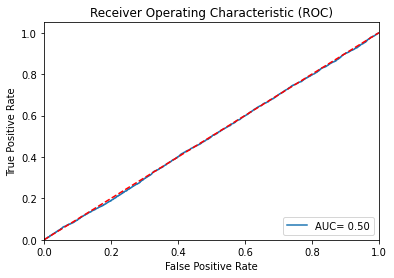

In [ ]:
lrs(x_resampled_smen, y_resampled_smen)

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
x_resampled_smtm, y_resampled_smtm = smote_tomek.fit_resample(x, y)
print(sorted(Counter(y_resampled_smtm).items()))

In [ ]:
lrs(x_resampled_smtm, y_resampled_smtm)